In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel('Daten_Parlament_v2.xlsx',index_col='Unnamed: 0')
df = df[~df.Volltext.isnull()]

In [2]:
df = df[~df.Partei.isnull()]

In [3]:
L = []
for row in df.Partei:
    l = row.split(';')
    L.append(l)

In [4]:
partei_ser = pd.Series(L)

In [5]:
y = []
for x in df.Partei.dropna().map(lambda row: row.split(';')).tolist():
    y+=x    
Parteien_unique = np.unique(np.array(y))

In [6]:
d={}
for partei in Parteien_unique:
    d[partei]=partei_ser.map(lambda x: partei in x)

In [7]:
dfPartei = pd.DataFrame(d)

In [8]:
df.Sitzungsdatum

0      2020-09-22
5      2020-11-24
6      2020-12-08
7      2021-02-23
8      2021-02-23
          ...    
1991   2011-05-03
1992   2007-01-16
1993   2016-08-23
1996   2016-09-20
1997   2016-09-20
Name: Sitzungsdatum, Length: 1695, dtype: datetime64[ns]

In [9]:
dfPartei['Sitzungsdatum']=df.Sitzungsdatum

In [10]:
dfPartei = dfPartei.set_index('Sitzungsdatum')

In [11]:
dfPartei=dfPartei.map(lambda x:{False:0,True:1}[x])

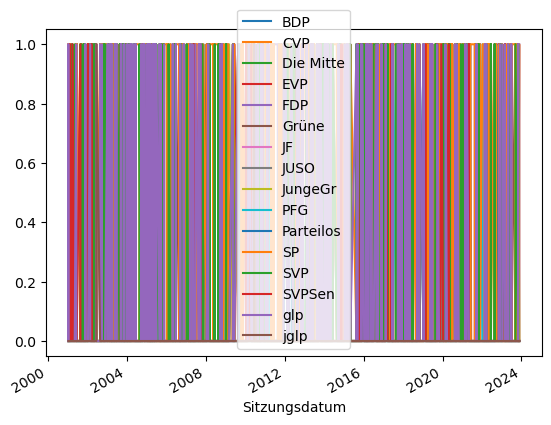

In [12]:
dfPartei.plot();

Text(0, 0.5, 'Anzahl Geschäfte pro Partei')

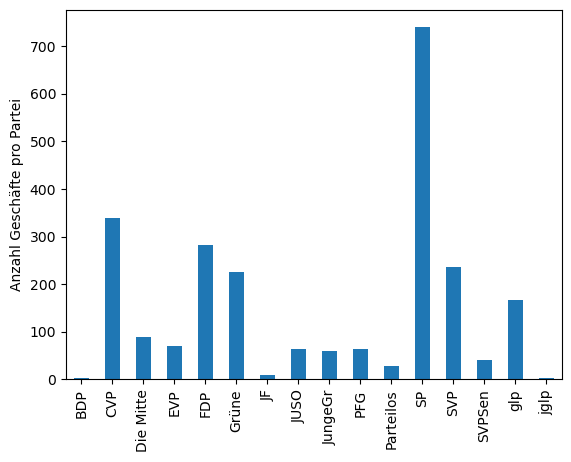

In [13]:
dfPartei.sum().plot.bar()
plt.ylabel('Anzahl Geschäfte pro Partei')

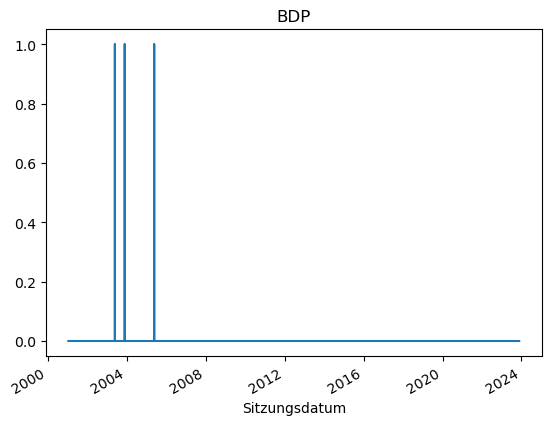

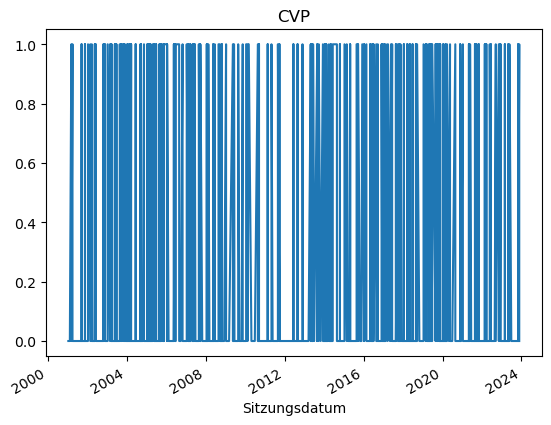

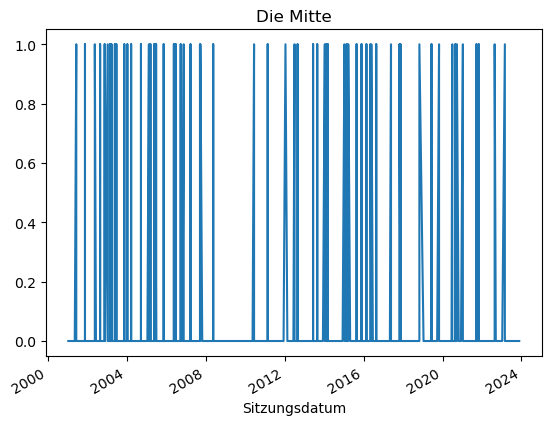

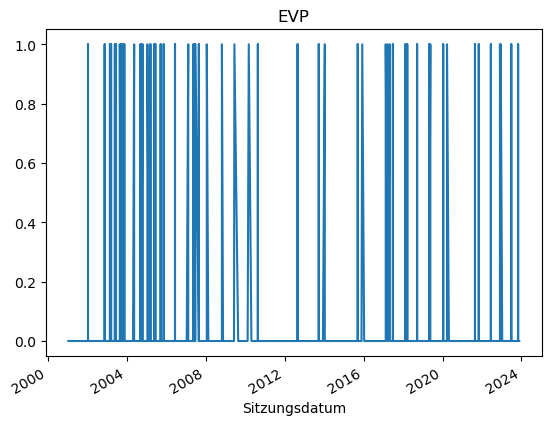

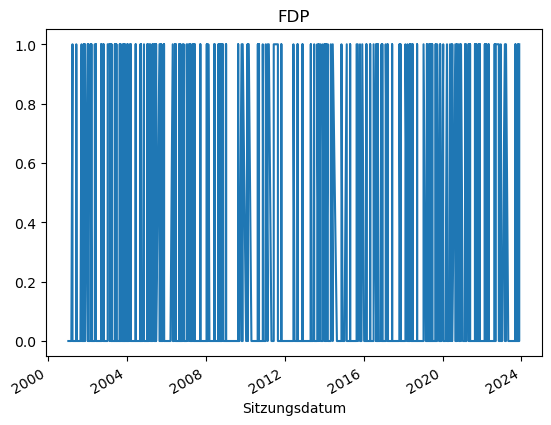

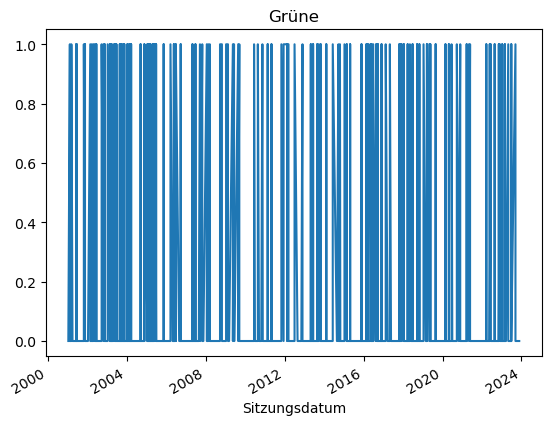

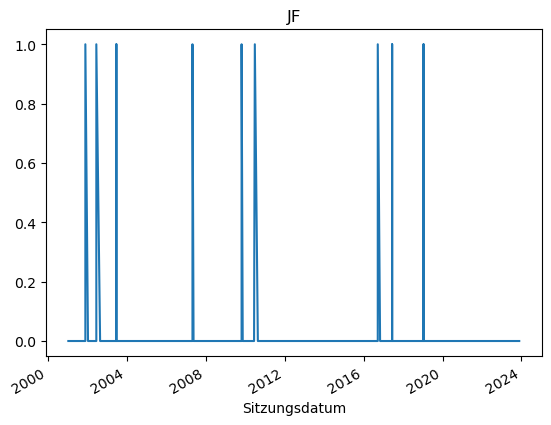

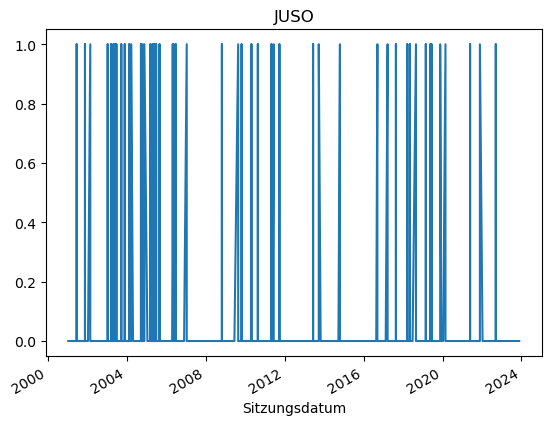

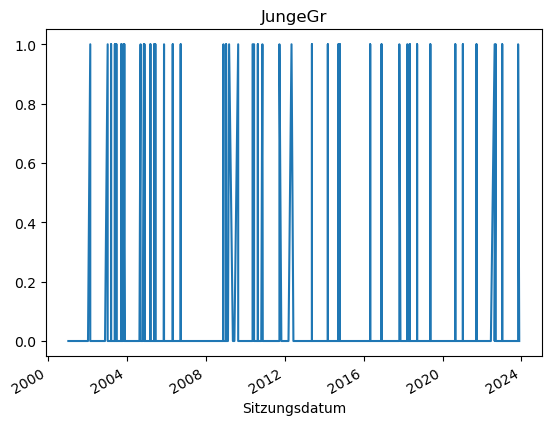

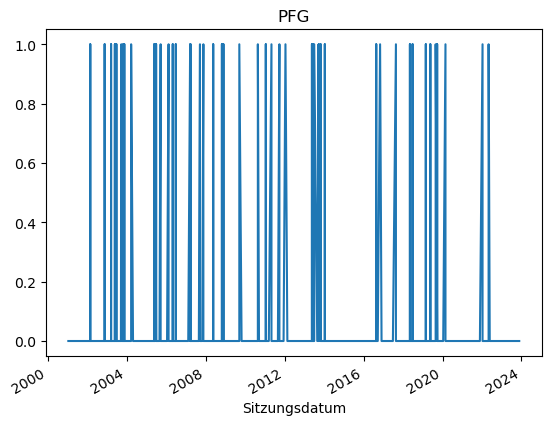

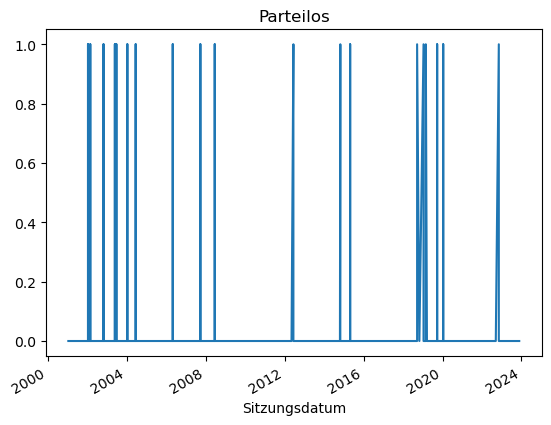

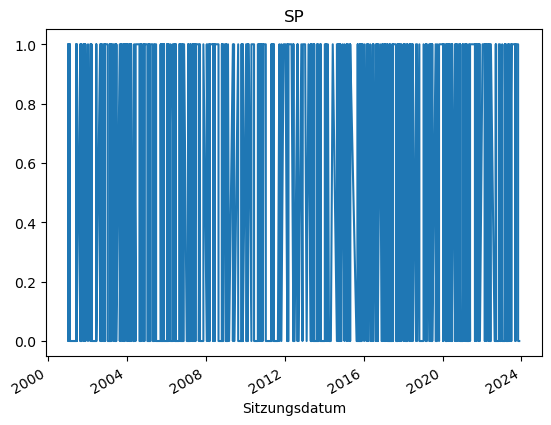

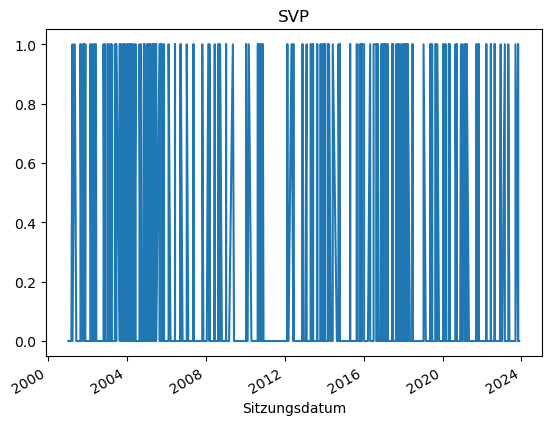

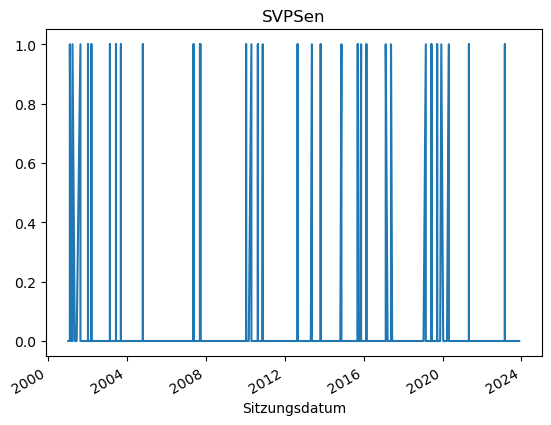

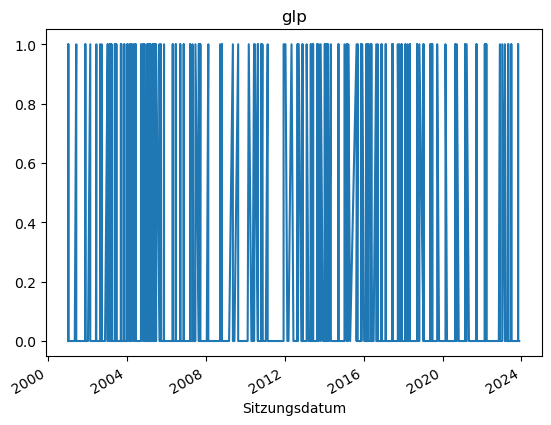

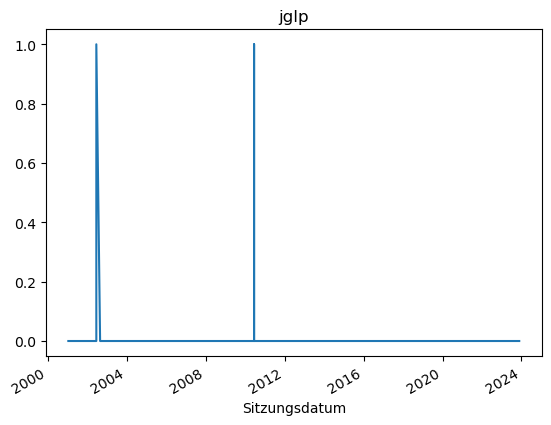

In [14]:
for col in dfPartei.columns:
    plt.figure()
    dfPartei[col].plot()
    plt.title(col)

In [15]:
d = {}
for partei in Parteien_unique:
    anz_partei = []
    jahre = dfPartei.index.year.dropna().unique().sort_values()
    for y in jahre:
        x = dfPartei[dfPartei.index.year==y].sum()
        
        anz_partei.append(x[partei])
    
    d[partei]=pd.Series(anz_partei,name=partei,index=jahre.astype('int'))
    


In [16]:
len(d['BDP'])

23

In [17]:
df_partei = pd.DataFrame(d)

<Axes: xlabel='Sitzungsdatum'>

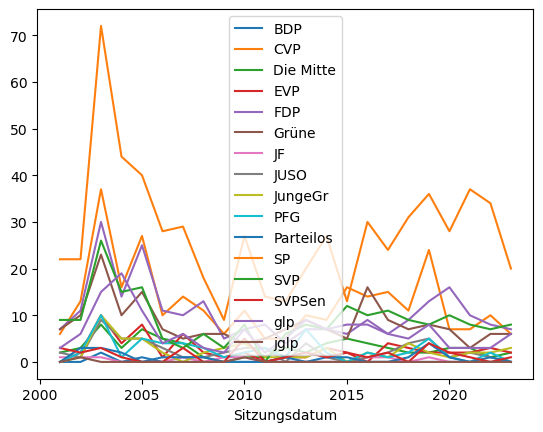

In [18]:
df_partei.plot()

In [30]:
df_partei2=df_partei.copy()

In [31]:
df_partei2['CVP/die Mitte']=df_partei2['CVP']+df_partei2['Die Mitte']
del df_partei2['CVP']
del df_partei2['Die Mitte']
df_partei2['glp']=df_partei2['glp']+df_partei2['jglp']
del df_partei2['jglp']
df_partei2['SP']=df_partei2['SP']+df_partei2['JUSO']+df_partei2['PFG']
df_partei2['Grüne']=df_partei2['Grüne']+df_partei2['JungeGr']
del df_partei2['JungeGr']
del df_partei2['PFG']

df_partei2['FDP']=df_partei2['FDP']+df_partei2['JF']
del df_partei2['JF']
del df_partei2['JUSO']
df_partei2['SVP']=df_partei2['SVP']+df_partei2['SVPSen']
del df_partei2['SVPSen']

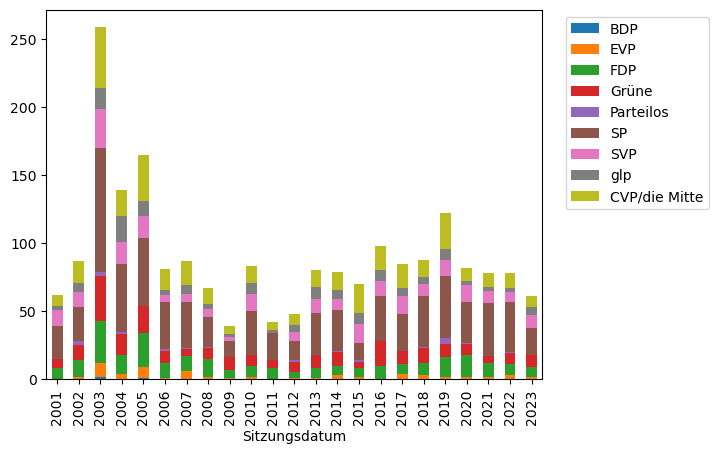

In [36]:
df_partei2.plot( kind='bar', stacked=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.savefig('barchart_Parteien.svg', transparent=True)

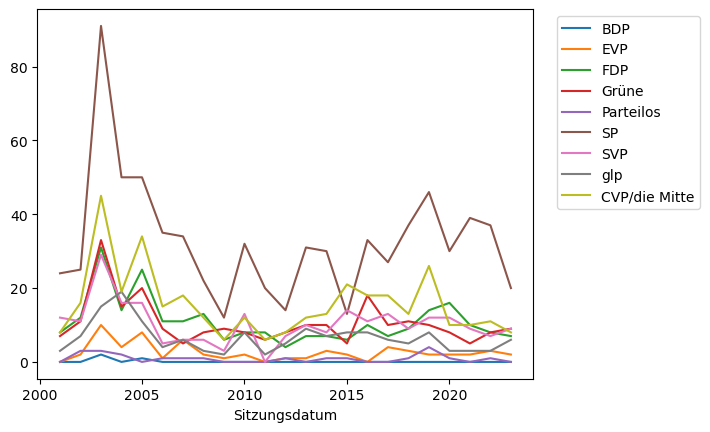

In [33]:
df_partei2.plot( )
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))
plt.savefig('linechart_Parteien.svg')

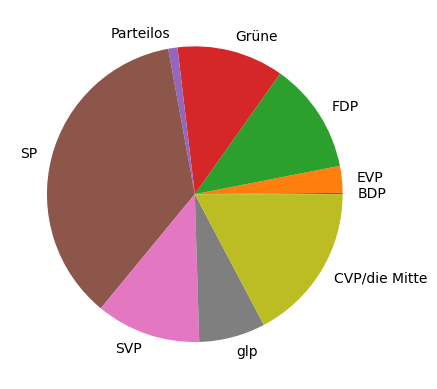

In [37]:
df_partei2.sum().plot.pie()
plt.savefig('PieChart_Parteien.svg', transparent=True)